<a href="https://colab.research.google.com/github/dem0nsl4yer/Machine_Vision_Carbon_Nanomaterial_Identification/blob/main/Nanocarbon_identification_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the chosen dataset
We want to use a standardized dataset - lets use Food 101 data from ETH Zurich.

# Import necessary libraries and modules

In [1]:
!git clone https://github.com/dem0nsl4yer/Machine_Vision_Carbon_Nanomaterial_Identification.git


Cloning into 'Carbon_Nanomaterial_Phase_Identification'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 81 (delta 14), reused 23 (delta 5), pack-reused 48
Receiving objects: 100% (81/81), 160.60 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
import os
from PIL import Image
import numpy as np
from keras import models
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from keras.preprocessing import image
import requests
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from tensorflow.keras.preprocessing import image
# Import custom functions for model prediction and attribution

from Machine_Vision_Carbon_Nanomaterial_Identification.predict import predict_class, get_attribution
#from predict import predict_class, get_attribution

Importing images to test out. Feel free to modify the links to whatever images you would like to test.

In [3]:
# Import the 'gdown' library for downloading files from Google Drive

! pip install gdown

# Download images for testing


In [4]:
import gdown

url = {}
# URLs of the files on Google Drive
url[0] = 'https://drive.google.com/uc?id=1KcfEkkxZlGwS4ApkSsZ1Gari_ql5j8j7'
url[1] = 'https://drive.google.com/uc?id=1JKhoGl__ZacVQaRVIZX5WwMXhgkFQF38'
#url[1] = 'https://drive.google.com//uc?id=1zaaw6Daa9bHzalMKr3YwNhIL7STohlaG'
#url[2] = 'https://drive.google.com/uc?id=1_g1F9sdIK14q9WMMPvk17gqZ3z1Zwvx2'
url[2] = 'https://drive.google.com/uc?id=1JPCOuKdl2p2VrZMf9itkhaOQJyADSJFw'
url[3] = 'https://drive.google.com/uc?id=1OY06wnjJreO2SHapNZ1Dr3JI-Su_Hmde'
url[4] = 'https://drive.google.com/uc?id=1z-dYdbSdGUpaoko2nh_EjCTvwdV8GRDQ'
url[5] = 'https://drive.google.com/uc?id=1PBZOCSZ4Prkd-mjvMI83xlqHFx6cgDz9'

# Output file paths for each download
output_files = ['./1.jpg', './2.jpg', './3.jpg', './4.jpg', './5.jpg', './6.jpg']

# Download the files using gdown
for i in range(len(url)):
    print(f"Downloading file {i+1}...")
    gdown.download(url[i], output_files[i])

print("All files downloaded successfully.")

Downloading...
From: https://drive.google.com/uc?id=1JKhoGl__ZacVQaRVIZX5WwMXhgkFQF38
To: /content/1.jpg
100%|██████████| 138k/138k [00:00<00:00, 19.0MB/s]


Downloading...
From: https://drive.google.com/uc?id=1DJ9e0Ri8e7xRAnRtQx0gfv8PJ2HcRvWq
To: /content/2.jpg
100%|██████████| 31.8k/31.8k [00:00<00:00, 32.6MB/s]


Downloading...
From: https://drive.google.com/uc?id=1JPCOuKdl2p2VrZMf9itkhaOQJyADSJFw
To: /content/3.jpg
100%|██████████| 13.1k/13.1k [00:00<00:00, 22.6MB/s]


Downloading...
From: https://drive.google.com/uc?id=1OY06wnjJreO2SHapNZ1Dr3JI-Su_Hmde
To: /content/4.jpg
100%|██████████| 82.4k/82.4k [00:00<00:00, 68.8MB/s]


Downloading...
From: https://drive.google.com/uc?id=1z-dYdbSdGUpaoko2nh_EjCTvwdV8GRDQ
To: /content/5.jpg
100%|██████████| 95.5k/95.5k [00:00<00:00, 33.4MB/s]


Downloading...
From: https://drive.google.com/uc?id=1NB4b29-EUoPoUxwVuXsjAAK8MbD9Vcwq
To: /content/6.jpg
100%|██████████| 41.3k/41.3k [00:00<00:00, 52.1MB/s]

All files downloaded successfully.


# Load the tried and tested model on 7 classes -
- allotrope_list = ['nanotube', 'cvddiamond', 'graphene', 'mdiamond', 'ndiamond', 'qcarbon', 'substrate']

In [5]:
import gdown

url = 'https://drive.google.com/uc?id=1PcDPV4D3SPsiCILykv_Ms50osre_hhYM'
output = 'QCbest_7class.hdf5'  # Specify the desired output filename and extension
gdown.download(url, output, quiet=False)

# Download the InceptionV3 model
url = 'https://drive.google.com/uc?id=1C9R1MeGYlk6jBkeJPJ5WxbTCUSdbNhjh'
output = 'InceptionV3.hdf5'
gdown.download(url, output, quiet=False)

# Download the DenseNet169 model
url = 'https://drive.google.com/uc?id=1jrgXijTdXAWxk0uxHgfNZgOWtb6E4FEr'
output = 'DenseNet169.hdf5'
gdown.download(url, output, quiet=False)

# Download the MobileNetV2 model
url = 'https://drive.google.com/uc?id=1qSdSUM7c30qD8ICxQgr_825JDMGRSQTU'
output = 'MobileNetV2.hdf5'
gdown.download(url, output, quiet=False)

# Download the ResNet50 model
url = 'https://drive.google.com/uc?id=1uD2DLVZbtxPhUJ6PqMwi5nrwy7tv2La1'
output = 'ResNet50.hdf5'
gdown.download(url, output, quiet=False)

# Download the VGG16 model
url = 'https://drive.google.com/uc?id=1KkV8EaHfRbcvIFnTOgBXbmOqOn3CLP0o'
output = 'VGG16.hdf5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PcDPV4D3SPsiCILykv_Ms50osre_hhYM
To: /content/QCbest_7class.hdf5
100%|██████████| 89.1M/89.1M [00:01<00:00, 45.2MB/s]


'QCbest_7class.hdf5'

# Load the trained model


In [ ]:
K.clear_session()
model = load_model('DenseNet169.hdf5',compile = False)

## Prediction and Attribution Functions
The `predict_class` function is responsible for predicting the carbon nanomaterial phase from a given SEM image using the trained model. It takes the following inputs:

- `model`: The pre-trained CNN model for phase identification.
- `images`: A list of file paths to the SEM images to be predicted.
- `show` (optional, default=True): A boolean flag that determines whether to display the predicted results alongside the input images.

1/1 [==============================] - 2s 2s/step


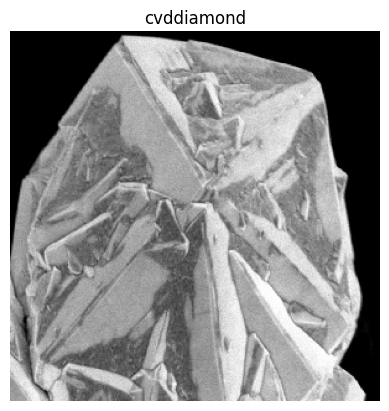

cvddiamond
1/1 [==============================] - 0s 251ms/step


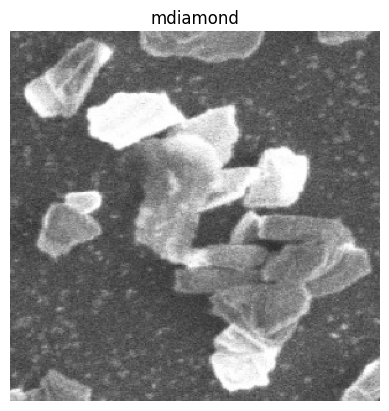

mdiamond
1/1 [==============================] - 0s 228ms/step


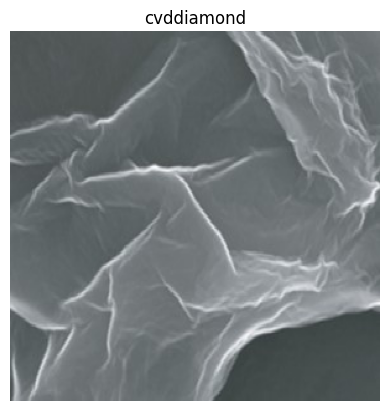

cvddiamond
1/1 [==============================] - 0s 232ms/step


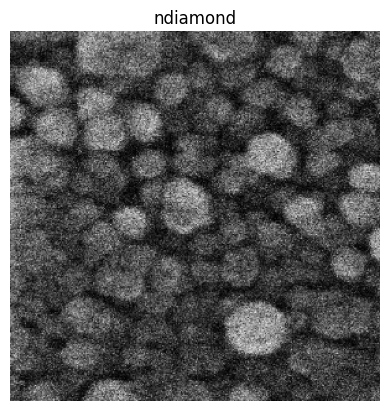

ndiamond
1/1 [==============================] - 0s 250ms/step


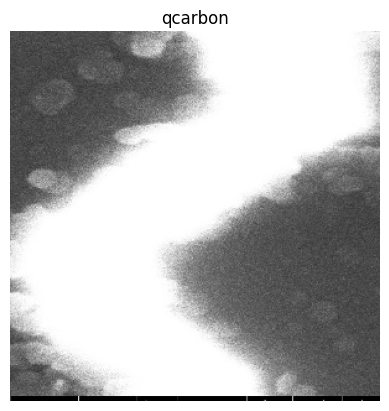

qcarbon
1/1 [==============================] - 0s 226ms/step


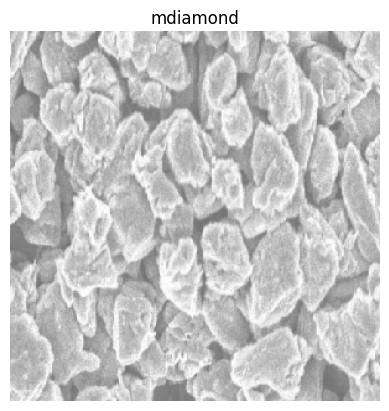

mdiamond


In [7]:
# Make a list of downloaded images and test the trained model
#from tensorflow.keras.preprocessing import image

images = []
for i in range(1,7):
    images.append(f'{i}.jpg')
predict_class(model, images, True)

### `get_attribution` Function

The `get_attribution` function is used to generate the Class Activation Maps (CAM) for a given carbon nanomaterial phase image. The CAM highlights the regions of the image that most contribute to the model's prediction. This function requires the following inputs:

- `allo`: File path to the SEM image of the carbon nanomaterial phase.

The function performs the following steps:

1. Loads the image and resizes it to the target size of (299, 299).
2. Normalizes the image pixel values to be in the range [0, 1].
3. Retrieves the output and the last convolutional layer's activation of the model using the provided image.
4. Computes the gradients of the class output with respect to the activation maps of the last convolutional layer.
5. Aggregates the gradients to obtain the Class Activation Map (CAM).
6. Plots the original image and the heatmap of the CAM with transparency to visualize the regions of interest.
7. Superimposes the heatmap on the original image to create a visualization of the regions contributing to the model's prediction.
8. Saves the superimposed image as 'classactivation.png' and displays it alongside the heatmap.

The `get_attribution` function returns the model's predictions for the provided carbon nanomaterial phase image.

These functions play a crucial role in evaluating the model's accuracy and understanding its reasoning behind the predictions. By using CAM, researchers can gain valuable insights into the specific image regions that drive the model's decision-making process for phase identification.

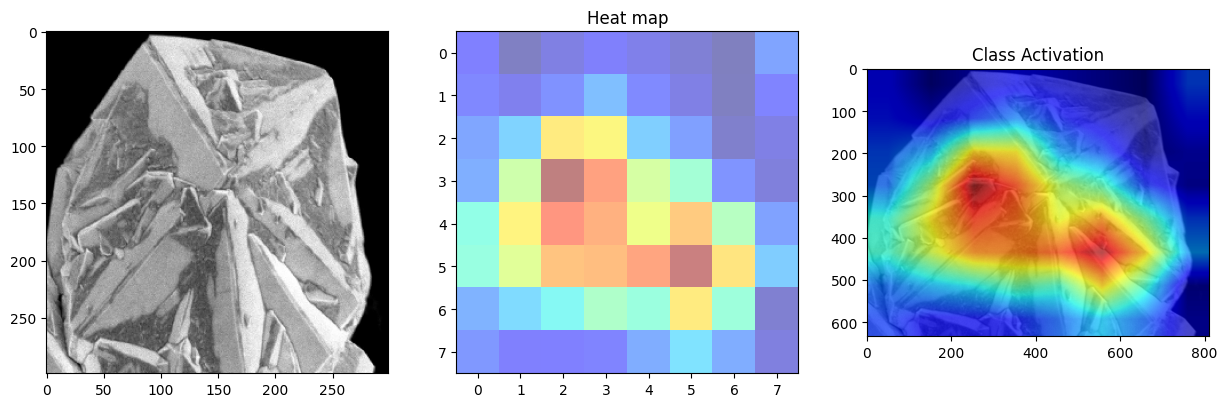

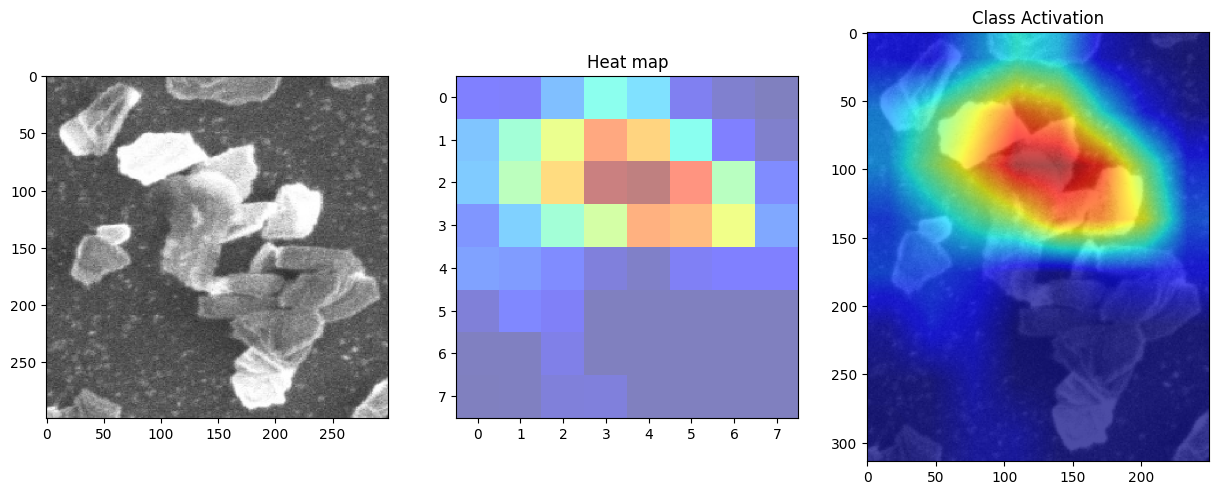

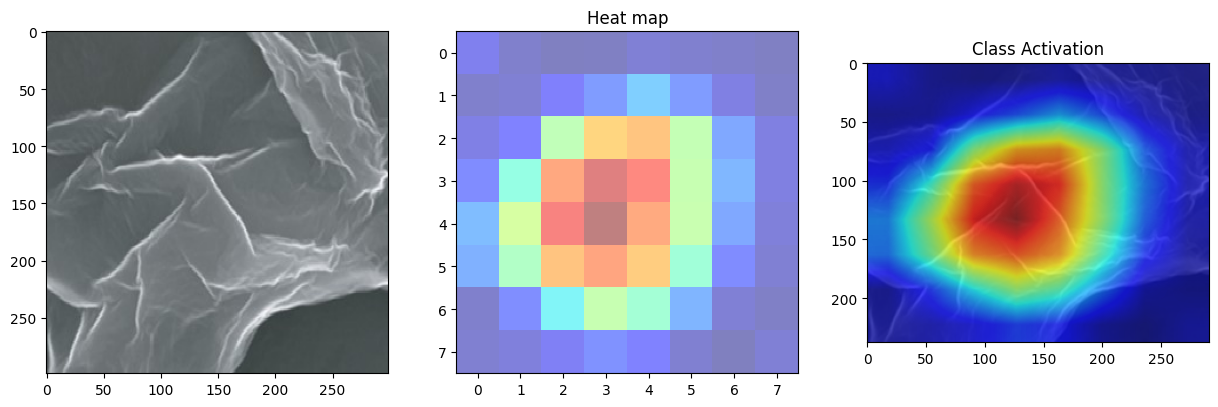

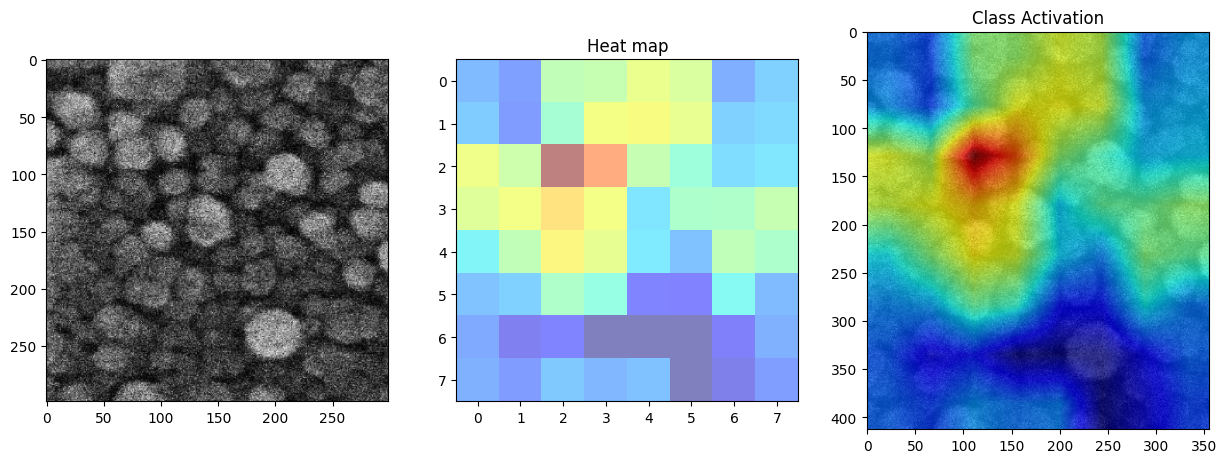

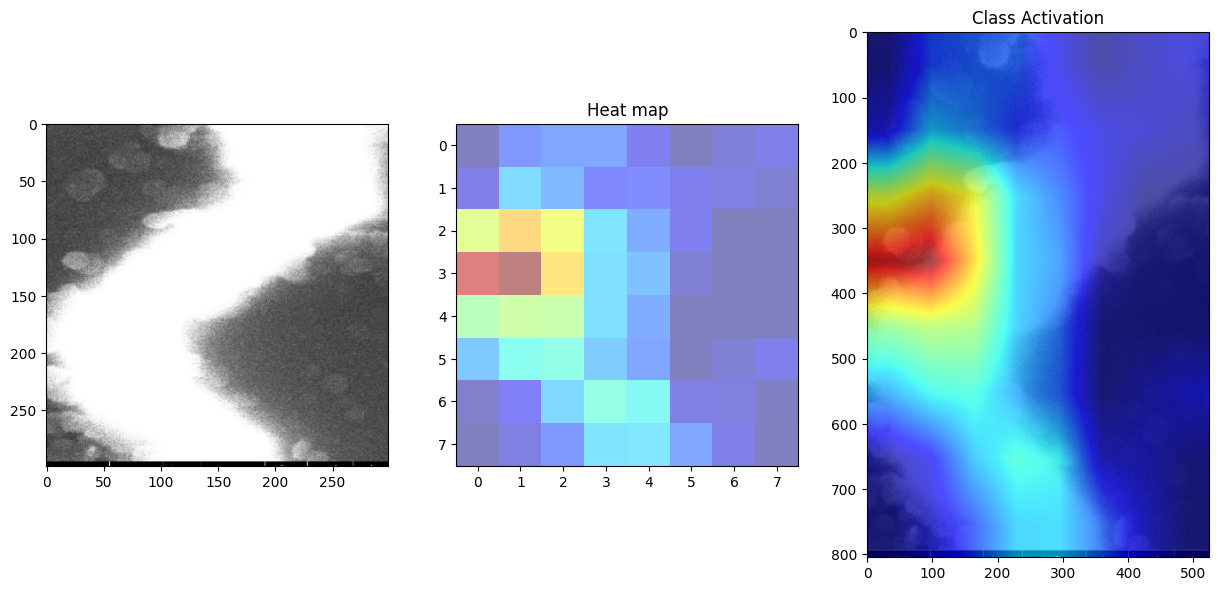

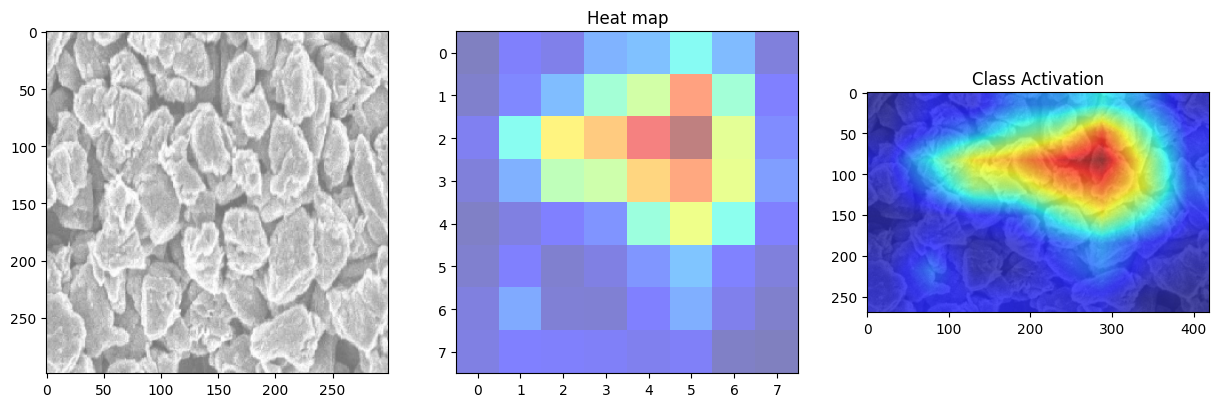

In [11]:
for i in range(1,7):
    pred = get_attribution(model, f'{i}.jpg')
#print("Here are softmax predictions..",pred)

In [ ]:
# Loading and pre-processing image

from PIL import Image
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path):
    # Load the image using PIL (Python Imaging Library)
    pil_image = Image.open(image_path)
    
    # Resize the image to the desired dimensions
    target_size = (299, 299)  # The target size used in your model
    pil_image = pil_image.resize(target_size, Image.ANTIALIAS)
    
    # Convert the PIL image to a numpy array
    numpy_image = keras.preprocessing.image.img_to_array(pil_image)
    
    # Preprocess the image (e.g., rescaling, normalization, etc.)
    preprocessed_image = numpy_image / 255.0  # Example normalization
    
    return preprocessed_image


In [ ]:
models = ['VGG16', 'ResNet50', 'MobileNetV2', 'DenseNet169', 'InceptionV3']

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow import keras


# Define class labels for the different nanomaterial phases
class_labels = ['cvddiamond', 'graphene', 'mdiamond', 'nanotube', 'ndiamond', 'qcarbon', 'substrate']

# Define the grid layout
num_rows = len(models)
num_cols = 6

# Calculate the total number of subplots needed
total_subplots = num_rows * num_cols

# Create a new figure and axes for each row of models
fig, all_axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = all_axes.reshape((num_rows, num_cols))

# Loop through each model
for row, (model_name, ax_row) in enumerate(zip(models, axes)):
    K.clear_session()
    model_best = load_model(f'{model_name}.hdf5', compile=False)
    
    # Loop through each image
    for col, image_name in enumerate(range(1, 7)):
        # Load and preprocess the image
        image_path = f'{image_name}.jpg'
        image = load_and_preprocess_image(image_path)  # Replace with your image preprocessing function
        
        # Make the prediction
        prediction = model_best.predict(np.expand_dims(image, axis=0))
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_labels[predicted_class_index]
        
        # Plot the image and predicted class label
        ax = ax_row[col]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'Model: {model_name}\nPredicted: {predicted_class}')
        
        # Remove empty subplots if necessary
        if (row * num_cols + col + 1) > total_subplots:
            fig.delaxes(ax)
        
plt.tight_layout()
plt.show()

# Additional Details


In [ ]:
# Additional Details
print("The trained model used in this Colab notebook is loaded from 'Carbon_Nanomaterial_Phase_Identification/QCbest_7class.hdf5'.")
print("The model is trained to classify carbon nanomaterials into the 7 classes mentioned above.")
print("It has been trained on a large dataset of labeled carbon nanomaterial images.")
print("The model can predict the class of a given carbon nanomaterial image with good accuracy.")
print("This Colab notebook demonstrates how to use the trained model to predict the classes of downloaded images.")
print("You can test the model's performance on different carbon nanomaterial images by modifying the image URLs in the 'url' dictionary.")
print("Note: The performance of the model may vary depending on the quality and diversity of the test images.")

The trained model used in this Colab notebook is loaded from 'Carbon_Nanomaterial_Phase_Identification/QCbest_7class.hdf5'.
The model is trained to classify carbon nanomaterials into the 7 classes mentioned above.
It has been trained on a large dataset of labeled carbon nanomaterial images.
The model can predict the class of a given carbon nanomaterial image with good accuracy.
